# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***.

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method.

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [49]:
ri = pd.read_csv("Ready_to_ML.csv")

In [50]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26711 entries, 0 to 26710
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     26711 non-null  object 
 1   make                           26711 non-null  object 
 2   location                       26711 non-null  object 
 3   price                          26711 non-null  float64
 4   body_type                      26711 non-null  object 
 5   type                           26711 non-null  object 
 6   warranty                       26711 non-null  object 
 7   mileage                        26711 non-null  float64
 8   gearbox                        26711 non-null  object 
 9   fuel_type                      26711 non-null  object 
 10  seller                         26711 non-null  object 
 11  engine_size                    26711 non-null  float64
 12  gears                          26711 non-null 

In [51]:
ri.head(3).T

,0,1,2
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8..."
price,16950.0,80900.0,69900.0
body_type,Compact,Compact,Compact
type,Used,Pre-registered,Used
warranty,Yes,Yes,Yes
mileage,120200.0,5000.0,18900.0
gearbox,Manual,Automatic,Automatic
fuel_type,Diesel,Electric,Benzine


In [6]:
ri.head()

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 160,Mercedes-Benz,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.0,Compact,Used,Yes,120200.0,Manual,Diesel,Dealer,1595.0,5.0,98.0,Front,Alloy wheels,1270.0,No,Cloth,2.0,efficient,6.0,75.0,3.800,Standard,Standard,Safety Premium Package
1,Mercedes-Benz EQE 350,Mercedes-Benz,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.0,Compact,Pre-registered,Yes,5000.0,Automatic,Electric,Dealer,1.0,1.0,0.0,4WD,"Alloy wheels (21""), Shift paddles, Sport packa...",2355.0,No,Part/Full Leather,1.0,efficient,0.0,215.0,2.359,Premium,Plus,Safety Premium Package
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.0,Compact,Used,Yes,18900.0,Automatic,Benzine,Dealer,1991.0,8.0,162.0,4WD,Alloy wheels,1555.0,No,Part/Full Leather,2.0,unefficient,2.0,310.0,8.400,Standard,Standard,Safety Premium Plus Package
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.0,Compact,Used,Yes,18995.0,Automatic,Benzine,Dealer,1991.0,7.0,169.0,4WD,Sport seats,1455.0,No,Part/Full Leather,2.0,unefficient,2.0,225.0,7.300,Standard,Standard,Safety Premium Package
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.0,Compact,Used,Yes,197000.0,Automatic,Diesel,Dealer,2143.0,7.0,162.0,4WD,Alloy wheels,1545.0,No,Part/Full Leather,2.0,unefficient,7.0,100.0,4.900,Standard,Standard,Safety Premium Plus Package


In [52]:
ri.select_dtypes(exclude=['number']).nunique()

make_model                        490
make                               13
location                         7178
body_type                           6
type                                4
warranty                            2
gearbox                             3
fuel_type                           4
seller                              2
drivetrain                          3
extras                           9021
full_service_history                2
upholstery                          2
energy_efficiency_class             2
comfort_&_convenience_Package       3
entertainment_&_media_Package       2
safety_&_security_Package           3
dtype: int64

### Drop

In [53]:
ri1=ri.copy()

In [54]:
ri1.drop(columns=['make','location','extras'],inplace=True)

In [55]:
ri1.head(3).T

,0,1,2
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG
price,16950.0,80900.0,69900.0
body_type,Compact,Compact,Compact
type,Used,Pre-registered,Used
warranty,Yes,Yes,Yes
mileage,120200.0,5000.0,18900.0
gearbox,Manual,Automatic,Automatic
fuel_type,Diesel,Electric,Benzine
seller,Dealer,Dealer,Dealer
engine_size,1595.0,1.0,1991.0


In [56]:
def clean_column(col):
    col = col.strip().lower()                          # Küçük harf ve boşluk temizliği
    col = col.replace('&', 'and')                      # & yerine "and"
    #col = col.replace(' ', '_')                        # Boşluk yerine alt çizgi
    col = ''.join(c for c in col if c.isalnum() or c == '_')  # Harf, rakam ve alt çizgi dışındakileri sil
    return col

# Tüm kolon isimlerine uygula
ri1.columns = [clean_column(col) for col in ri1.columns]


In [57]:
ri1.columns

Index(['make_model', 'price', 'body_type', 'type', 'warranty', 'mileage',
       'gearbox', 'fuel_type', 'seller', 'engine_size', 'gears',
       'co_emissions', 'drivetrain', 'empty_weight', 'full_service_history',
       'upholstery', 'previous_owner', 'energy_efficiency_class', 'age',
       'power_kw', 'cons_avg', 'comfort_and_convenience_package',
       'entertainment_and_media_package', 'safety_and_security_package'],
      dtype='object')

In [58]:
model_counts = ri1['make_model'].value_counts()

valid_models = model_counts[model_counts >= 100].index


ri1 = ri1[ri1['make_model'].isin(valid_models)]
ri1 = ri1.reset_index(drop=True)

In [59]:
df=ri.copy()

In [60]:
non_numeric_columns = ri.select_dtypes(exclude=['number']).columns

In [61]:
X = df.drop(columns="price", axis=1)
y = df["price"]

## Feature Engineering

- Focus on the "Extras" column
- Think how a categorical feature can be converted into ordinal.

### Converting the Extras feature from object to numeric

In [62]:
df_filled=pd.DataFrame(ri['extras'].copy())

In [63]:
df_filled

,extras
0,Alloy wheels
1,"Alloy wheels (21""), Shift paddles, Sport packa..."
2,Alloy wheels
3,Sport seats
4,Alloy wheels
...,...
26706,Alloy wheels
26707,"Alloy wheels (16""), Trailer hitch"
26708,"Alloy wheels, Automatically dimming interior m..."
26709,"Alloy wheels (18""), Automatically dimming inte..."


In [64]:
def count_features(text):
    if pd.isna(text):
        return 0
    return len(text.split(','))

In [65]:
df_filled['ex_count'] = df_filled['extras'].apply(count_features)


In [66]:
df_transformed = df_filled.copy()

# 1. Log dönüşümü (log(1 + x)
df_transformed['ex_count_log'] = np.log1p(df_transformed['ex_count'])


In [67]:
log_Q1 = df_transformed['ex_count_log'].quantile(0.25)
log_Q3 = df_transformed['ex_count_log'].quantile(0.75)
log_IQR = log_Q3 - log_Q1
log_upper = log_Q3 + 1.5 * log_IQR

log_outliers = df_transformed[df_transformed['ex_count_log'] > log_upper]
print("Log dönüşüm sonrası outlier sayısı:", len(log_outliers))

Log dönüşüm sonrası outlier sayısı: 0


In [68]:
df_filled['price_segment'] = pd.qcut(ri['price'], q=3, labels=["Low", "Medium", "High"])

In [69]:
df_filled['ex_density'] = df_filled['ex_count'] / ri['price']

In [70]:
df_filled['ex_cat'] = pd.cut(
    df_filled['ex_density'],
    bins=[-float('inf'), 0.00015, 0.00035, float('inf')],
    labels=["Basic", "Comfort", "Luxe"]
)

In [71]:
df_filled

,extras,ex_count,price_segment,ex_density,ex_cat
0,Alloy wheels,1,Medium,0.000059,Basic
1,"Alloy wheels (21""), Shift paddles, Sport packa...",6,High,0.000074,Basic
2,Alloy wheels,1,High,0.000014,Basic
3,Sport seats,1,High,0.000021,Basic
4,Alloy wheels,1,Medium,0.000060,Basic
...,...,...,...,...,...
26706,Alloy wheels,1,High,0.000027,Basic
26707,"Alloy wheels (16""), Trailer hitch",2,Low,0.000364,Luxe
26708,"Alloy wheels, Automatically dimming interior m...",3,Low,0.000411,Luxe
26709,"Alloy wheels (18""), Automatically dimming inte...",2,High,0.000067,Basic


In [72]:
ri['extras_cat']=df_filled.ex_cat

In [73]:
ri['extras_cat'].unique()

['Basic', 'Luxe', 'Comfort']
Categories (3, object): ['Basic' < 'Comfort' < 'Luxe']

In [74]:
# from sklearn.preprocessing import LabelEncoder

# # LabelEncoder nesnesi oluştur
# le = LabelEncoder()

# # Her kategorik sütunu encode edip yeni bir sütuna ata
# df_filled['ex_cat_enc'] = le.fit_transform(df_filled['ex_cat'])

In [75]:
#df_filled['ex_cat_enc'].unique()

In [76]:
ri1.head(3)

,make_model,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kw,cons_avg,comfort_and_convenience_package,entertainment_and_media_package,safety_and_security_package
0,Mercedes-Benz A 180,24400.0,Compact,Used,Yes,27150.0,Manual,Diesel,Dealer,1461.0,6.0,120.0,Front,1330.0,No,Part/Full Leather,2.0,unefficient,2.0,85.0,4.5,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,7450.0,Compact,Used,No,157500.0,Manual,Diesel,Dealer,1991.0,6.0,138.0,Front,1295.0,Yes,Cloth,2.0,unefficient,12.0,80.0,5.2,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,29800.0,Compact,Used,Yes,21734.0,Automatic,Diesel,Dealer,1461.0,7.0,99.5,Front,1445.0,No,Cloth,2.0,unefficient,2.0,85.0,3.9,Standard,Standard,Safety Premium Package


In [77]:
ri1.warranty.unique()

array(['Yes', 'No'], dtype=object)

In [78]:
def encode_yes_no_columns(df):
    binary_cols = []
    for col in df.columns:
        unique_vals = df[col].dropna().unique()
        if len(unique_vals) == 2 and set(unique_vals) <= {'Yes', 'No'}:
            df[col] = df[col].map({'No': 0, 'Yes': 1})
            binary_cols.append(col)
    print("Dönüştürülen sütunlar:", binary_cols)
    return df




In [79]:
ri1 = encode_yes_no_columns(ri1)

Dönüştürülen sütunlar: ['warranty', 'full_service_history']


In [80]:
ri1.select_dtypes(exclude=['number']).nunique()

make_model                         70
body_type                           6
type                                4
gearbox                             3
fuel_type                           4
seller                              2
drivetrain                          3
upholstery                          2
energy_efficiency_class             2
comfort_and_convenience_package     3
entertainment_and_media_package     2
safety_and_security_package         3
dtype: int64

In [81]:
ri1.energy_efficiency_class.unique()

array(['unefficient', 'efficient'], dtype=object)

In [82]:
ri1["upholstery"].unique()

array(['Part/Full Leather', 'Cloth'], dtype=object)

In [83]:
ri1["upholstery"] = ri1["upholstery"].map({"Cloth" : 0, "Part/Full Leather" : 1})

In [84]:
ri1["seller"] = ri1["seller"].map({"Dealer": 0, "Private seller": 1})

In [85]:
ri1.seller.unique()

array([0, 1])

In [86]:
ri1.energy_efficiency_class.unique()

array(['unefficient', 'efficient'], dtype=object)

In [87]:
ri1["energy_efficiency_class"] = ri1["energy_efficiency_class"].map({"unefficient": 0, "efficient": 1})

In [88]:
ri1.entertainment_and_media_package.unique()

array(['Plus', 'Standard'], dtype=object)

In [89]:
ri1.entertainment_and_media_package = ri1.entertainment_and_media_package.map({"Standard":0, "Plus":1})

In [91]:
ri1.shape

(19744, 24)

## multicollinearity control

In [92]:
ri1_numeric_columns = ri1.select_dtypes(include=['number'])

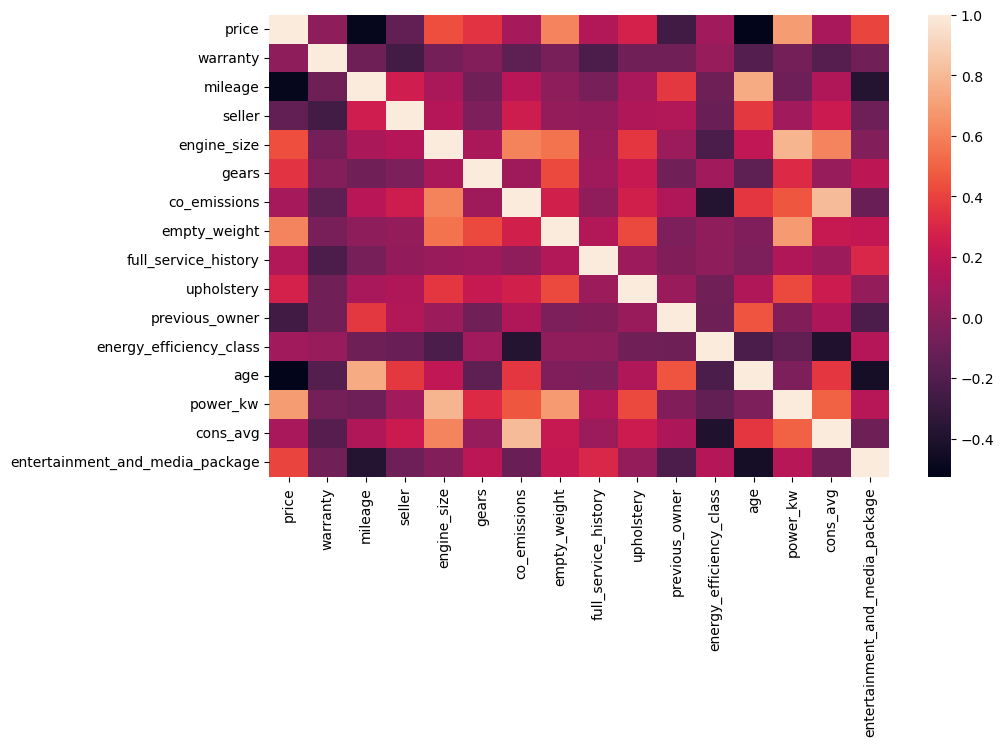

In [94]:
sns.heatmap(ri1_numeric_columns.corr())
plt.show()

In [353]:
# multicolunarity var

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [423]:
from sklearn.model_selection import train_test_split


In [424]:
X = ri1.drop(columns="price", axis=1)
y = ri["price"]

In [425]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [426]:
X_train

,make_model,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kw,cons_avg,comfort_and_convenience_package,entertainment_and_media_package,safety_and_security_package
12689,Skoda Fabia,Compact,Demonstration,0,11202.0,Manual,Benzine,0,999.0,5.0,103.0,Front,1110.0,1,0,1.0,1,1.0,70.0,4.5,Standard,1,Safety Premium Package
24709,Volvo C30,Coupe,Used,0,239000.0,Manual,Benzine,1,1596.0,5.0,167.0,Front,1178.0,0,1,1.0,0,12.0,74.0,7.0,Standard,0,Safety Standard Package
21686,Hyundai i20,Compact,Demonstration,0,650.0,Automatic,Benzine,0,998.0,7.0,128.0,Front,1190.0,0,0,1.0,0,0.0,74.0,5.6,Premium,1,Safety Premium Package
12362,SEAT Leon,Sedan,Used,0,26600.0,Manual,Benzine,0,1197.0,6.0,140.0,Front,1239.0,0,0,2.0,1,7.0,81.0,5.9,Premium,0,Safety Premium Package
3429,Opel Crossland,Off-Road/Pick-up,Demonstration,0,100.0,Automatic,Benzine,0,1199.0,6.0,113.0,Front,1280.0,1,0,1.0,1,0.0,96.0,5.0,Premium,1,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,Hyundai i20,Compact,Used,1,65528.0,Manual,Benzine,0,1248.0,5.0,119.0,Front,955.0,0,0,2.0,1,5.0,62.0,4.7,Standard,0,Safety Premium Package
5390,Renault Laguna,Coupe,Used,1,85000.0,Automatic,Diesel,0,1995.0,6.0,126.0,Front,1546.0,0,1,1.0,1,7.0,110.0,4.8,Premium,1,Safety Premium Package
860,Mercedes-Benz CLS 350,Coupe,Used,0,61474.0,Automatic,Diesel,0,2925.0,7.0,156.0,4WD,1935.0,1,1,1.0,1,4.0,210.0,5.9,Premium,1,Safety Premium Package
15795,Toyota Aygo,Compact,Used,1,60000.0,Manual,Benzine,0,998.0,5.0,93.0,Front,800.0,0,0,4.0,1,10.0,50.0,4.3,Standard,0,Safety Premium Package


In [427]:
X_test

,make_model,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kw,cons_avg,comfort_and_convenience_package,entertainment_and_media_package,safety_and_security_package
6267,Renault Laguna,Sedan,Used,0,97511.0,Manual,Benzine,0,1997.0,6.0,182.0,Front,1310.0,0,1,1.0,1,11.0,103.0,10.8,Standard,0,Safety Premium Package
22571,Hyundai SANTA FE,Off-Road/Pick-up,Used,0,35996.0,Automatic,Diesel,0,2199.0,6.0,174.0,4WD,1907.0,0,1,2.0,1,5.0,147.0,6.6,Premium,1,Safety Premium Package
22798,Hyundai i40,Station wagon,Used,1,141148.0,Manual,Diesel,0,1700.0,6.0,123.0,Front,1539.0,0,0,1.0,0,5.0,85.0,4.2,Standard,0,Safety Premium Package
18740,Nissan Terrano,Station wagon,Used,1,167500.0,Manual,Diesel,0,2953.0,5.0,240.0,4WD,1760.0,0,0,2.0,1,19.0,115.0,8.8,Standard,0,Safety Standard Package
5908,Renault Megane,Station wagon,Used,1,47141.0,Manual,Diesel,0,1461.0,6.0,125.0,Front,1287.0,1,0,1.0,1,2.0,85.0,3.9,Standard,1,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25787,Volvo V60,Station wagon,Used,0,20394.0,Automatic,Diesel,0,1969.0,8.0,36.0,4WD,2075.0,0,1,1.0,1,1.0,288.0,1.6,Premium,1,Safety Premium Package
9212,Fiat 500,Compact,Used,1,38235.0,Automatic,Benzine,0,1242.0,5.0,115.0,Front,940.0,0,1,2.0,0,5.0,51.0,4.9,Standard,0,Safety Premium Package
8309,Peugeot 508,Station wagon,Used,1,25628.0,Automatic,Diesel,0,1500.0,8.0,101.5,Front,1505.0,0,0,1.0,1,1.0,96.0,4.8,Standard,0,Safety Premium Package
5045,Renault Wind,Convertible,Used,0,80000.0,Manual,Benzine,0,1149.0,5.0,145.0,Front,1106.0,0,1,1.0,0,10.0,75.0,6.3,Standard,0,Safety Premium Package


In [398]:
y_train

12689    19450.0
24709     5250.0
21686    19990.0
12362    13590.0
3429     29350.0
          ...   
21575    11700.0
5390     13000.0
860      54980.0
15795     9999.0
23654    14572.0
Name: price, Length: 21368, dtype: float64

In [399]:
y_test

6267      7990.0
22571    28950.0
22798    12990.0
18740     8890.0
5908     16760.0
          ...   
25787    54890.0
9212     15900.0
8309     27900.0
5045      4999.0
18457    29990.0
Name: price, Length: 5343, dtype: float64

## OneHotEncoder

### Example

In [249]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")

# OneHotEncoder converts categorical features into dummies (0 and 1). If we want our model to treat all unique values ​​under the categorical feature equally,
# we convert our categorical data to 0 and 1 using the onehotencoder conversion algorithm.
# We could also use the get_dummies() function for this conversion, but since applying get_dummies() to all data and then separating the data into train and test sets will cause data leakege,
# categorical observations for the data we prepared for ML models must be converted into dummies features with the onehotencoder conversion algorithm.
# However, when converting to categorical data, the following should not be forgotten: if there is a hierarchical superiority or ranking (expensive,
# normal, cheap or Large, average, small, etc.) among unique observations in a categorical feature, the ordinalencoder conversion algorithm should be used.
# We will talk about this algorithm when it takes place. Conversion of categorical data to dummies features is done according to the unique categorical data in the train set where the fit process is performed.
# With the handle_unknown = "ignore" parameter, all categorical data passed in the test set and not in the train set are converted to 0. The default of this parameter is handle_unknown = "error".
# If the handle_unknown parameter remains at its default value, the onehotencoder algorithm will fail for an observation that is in the test set but not in the train set.

In [250]:
data = {"col": ['bad','worst','good', 'good', 'bad', "bed",'good', 'good', 'bad', "car"], "y": [1,2,3,4,5,6,7,8,9,10]}
data = pd.DataFrame(data)
data

,col,y
0,bad,1
1,worst,2
2,good,3
3,good,4
4,bad,5
5,bed,6
6,good,7
7,good,8
8,bad,9
9,car,10


In [251]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[["col"]], data["y"], test_size=0.3, shuffle=False)

In [252]:
X_train

,col
0,bad
1,worst
2,good
3,good
4,bad
5,bed
6,good


In [253]:
X_test

,col
7,good
8,bad
9,car


In [254]:
enc.fit_transform(X_train)
# Since the fit process is done on the train set,
# the transformation (transformation) in both the train and the test set will only be made according to the unique observations in the train set.


,col_bad,col_bed,col_good,col_worst
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0


In [255]:
enc.transform(X_test)
# Since the transformation in the test set is made according to the unique observations in the train set,
# the unique observations in both the train and the test set are converted to 1, while the non-observations (car) are converted to 0.


,col_bad,col_bed,col_good,col_worst
7,0.0,0.0,1.0,0.0
8,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0


## OrdinalEncoder

### Example

In [256]:
data = {"col": ['bad','worst','good', 'good', 'bad', 'good', 'good', 'bad', "ugly", "worst"], "y": [1,2,3,4,5,6,7,8,9,10]}
data = pd.DataFrame(data)
data
# If unique categorical data under a featura have a hierarchical advantage over each other (very bad, bad, good)
# or (cheap, average, expensive, very expensive) etc. If we want the model to treat all observations according to
# their superiority, that is, not to treat them equally, we use the ordianlencoder conversion algorithm.
# NOTE: Ordinalencoder has a special use in tree-based models. In this usage, we will always use ordinalencoder,
# regardless of whether the observations have a hierarchical superiority to each other. As for tree based models,
# this special usage will be explained in detail.

,col,y
0,bad,1
1,worst,2
2,good,3
3,good,4
4,bad,5
5,good,6
6,good,7
7,bad,8
8,ugly,9
9,worst,10


In [257]:
X_train, X_test, y_train, y_test = train_test_split(data[["col"]], data["y"], test_size=0.4, shuffle=False)

In [258]:
X_train

,col
0,bad
1,worst
2,good
3,good
4,bad
5,good


In [259]:
X_test

,col
6,good
7,bad
8,ugly
9,worst


In [260]:
from sklearn.preprocessing import OrdinalEncoder

categories = ['worst','bad','good']
# We need to define the order of the categories explicitly.

enc_2 = OrdinalEncoder(categories=[categories], handle_unknown="use_encoded_value", unknown_value=-1).set_output(transform="pandas")
# In ordinal encoder we can not use "ignore" case, other than that we use "use_encoded_value" parameter.
# We set the unknown_value as -1, since we want to be sure as it a different category.

In [261]:
enc_2.fit_transform(X_train)

,col
0,1.0
1,0.0
2,2.0
3,2.0
4,1.0
5,2.0


In [262]:
enc_2.transform(X_test)

,col
6,2.0
7,1.0
8,-1.0
9,0.0


### Converting Object Features into Numerical Features Using Make Column Transformer with OrdinalEncoder and OneHotEncoder

In [428]:
ri1.select_dtypes(exclude=['number']).nunique()

make_model                         490
body_type                            6
type                                 4
gearbox                              3
fuel_type                            4
drivetrain                           3
comfort_and_convenience_package      3
safety_and_security_package          3
dtype: int64

In [429]:
from sklearn.preprocessing import OrdinalEncoder

In [430]:
X_train

,make_model,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kw,cons_avg,comfort_and_convenience_package,entertainment_and_media_package,safety_and_security_package
12689,Skoda Fabia,Compact,Demonstration,0,11202.0,Manual,Benzine,0,999.0,5.0,103.0,Front,1110.0,1,0,1.0,1,1.0,70.0,4.5,Standard,1,Safety Premium Package
24709,Volvo C30,Coupe,Used,0,239000.0,Manual,Benzine,1,1596.0,5.0,167.0,Front,1178.0,0,1,1.0,0,12.0,74.0,7.0,Standard,0,Safety Standard Package
21686,Hyundai i20,Compact,Demonstration,0,650.0,Automatic,Benzine,0,998.0,7.0,128.0,Front,1190.0,0,0,1.0,0,0.0,74.0,5.6,Premium,1,Safety Premium Package
12362,SEAT Leon,Sedan,Used,0,26600.0,Manual,Benzine,0,1197.0,6.0,140.0,Front,1239.0,0,0,2.0,1,7.0,81.0,5.9,Premium,0,Safety Premium Package
3429,Opel Crossland,Off-Road/Pick-up,Demonstration,0,100.0,Automatic,Benzine,0,1199.0,6.0,113.0,Front,1280.0,1,0,1.0,1,0.0,96.0,5.0,Premium,1,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,Hyundai i20,Compact,Used,1,65528.0,Manual,Benzine,0,1248.0,5.0,119.0,Front,955.0,0,0,2.0,1,5.0,62.0,4.7,Standard,0,Safety Premium Package
5390,Renault Laguna,Coupe,Used,1,85000.0,Automatic,Diesel,0,1995.0,6.0,126.0,Front,1546.0,0,1,1.0,1,7.0,110.0,4.8,Premium,1,Safety Premium Package
860,Mercedes-Benz CLS 350,Coupe,Used,0,61474.0,Automatic,Diesel,0,2925.0,7.0,156.0,4WD,1935.0,1,1,1.0,1,4.0,210.0,5.9,Premium,1,Safety Premium Package
15795,Toyota Aygo,Compact,Used,1,60000.0,Manual,Benzine,0,998.0,5.0,93.0,Front,800.0,0,0,4.0,1,10.0,50.0,4.3,Standard,0,Safety Premium Package


In [431]:
X_train['comfort_and_convenience_package'].unique()

array(['Standard', 'Premium', 'Premium Plus'], dtype=object)

In [432]:
categories = ['Standard', 'Premium', 'Premium Plus']
# We need to define the order of the categories explicitly.

In [433]:
enc_2 = OrdinalEncoder(categories=[categories], handle_unknown="use_encoded_value", unknown_value=-1).set_output(transform="pandas")
# In ordinal encoder we can not use "ignore" case, other than that we use "use_encoded_value" parameter.
# We set the unknown_value as -1, since we want to be sure as it a different category.

In [434]:
X_train['comfort_and_convenience_package']=enc_2.fit_transform(pd.DataFrame(X_train['comfort_and_convenience_package']))

In [435]:
X_train['comfort_and_convenience_package']

12689    0.0
24709    0.0
21686    1.0
12362    1.0
3429     1.0
        ... 
21575    0.0
5390     1.0
860      1.0
15795    0.0
23654    0.0
Name: comfort_and_convenience_package, Length: 21368, dtype: float64

In [436]:
X_test['comfort_and_convenience_package']=enc_2.transform((pd.DataFrame(X_test['comfort_and_convenience_package'])))

In [437]:
X_test['comfort_and_convenience_package']

6267     0.0
22571    1.0
22798    0.0
18740    0.0
5908     0.0
        ... 
25787    1.0
9212     0.0
8309     0.0
5045     0.0
18457    1.0
Name: comfort_and_convenience_package, Length: 5343, dtype: float64

In [438]:
X_train

,make_model,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kw,cons_avg,comfort_and_convenience_package,entertainment_and_media_package,safety_and_security_package
12689,Skoda Fabia,Compact,Demonstration,0,11202.0,Manual,Benzine,0,999.0,5.0,103.0,Front,1110.0,1,0,1.0,1,1.0,70.0,4.5,0.0,1,Safety Premium Package
24709,Volvo C30,Coupe,Used,0,239000.0,Manual,Benzine,1,1596.0,5.0,167.0,Front,1178.0,0,1,1.0,0,12.0,74.0,7.0,0.0,0,Safety Standard Package
21686,Hyundai i20,Compact,Demonstration,0,650.0,Automatic,Benzine,0,998.0,7.0,128.0,Front,1190.0,0,0,1.0,0,0.0,74.0,5.6,1.0,1,Safety Premium Package
12362,SEAT Leon,Sedan,Used,0,26600.0,Manual,Benzine,0,1197.0,6.0,140.0,Front,1239.0,0,0,2.0,1,7.0,81.0,5.9,1.0,0,Safety Premium Package
3429,Opel Crossland,Off-Road/Pick-up,Demonstration,0,100.0,Automatic,Benzine,0,1199.0,6.0,113.0,Front,1280.0,1,0,1.0,1,0.0,96.0,5.0,1.0,1,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,Hyundai i20,Compact,Used,1,65528.0,Manual,Benzine,0,1248.0,5.0,119.0,Front,955.0,0,0,2.0,1,5.0,62.0,4.7,0.0,0,Safety Premium Package
5390,Renault Laguna,Coupe,Used,1,85000.0,Automatic,Diesel,0,1995.0,6.0,126.0,Front,1546.0,0,1,1.0,1,7.0,110.0,4.8,1.0,1,Safety Premium Package
860,Mercedes-Benz CLS 350,Coupe,Used,0,61474.0,Automatic,Diesel,0,2925.0,7.0,156.0,4WD,1935.0,1,1,1.0,1,4.0,210.0,5.9,1.0,1,Safety Premium Package
15795,Toyota Aygo,Compact,Used,1,60000.0,Manual,Benzine,0,998.0,5.0,93.0,Front,800.0,0,0,4.0,1,10.0,50.0,4.3,0.0,0,Safety Premium Package


In [439]:
X_train["entertainment_and_media_package"].unique()

array([1, 0])

In [440]:
X_train["safety_and_security_package"].unique()

array(['Safety Premium Package', 'Safety Standard Package',
       'Safety Premium Plus Package'], dtype=object)

In [441]:
categories_safety = ['Safety Premium Package', 'Safety Standard Package', 'Safety Premium Plus Package']

In [442]:
enc_2 = OrdinalEncoder(categories=[categories_safety], handle_unknown="use_encoded_value", unknown_value=-1).set_output(transform="pandas")

In [443]:
X_train['safety_and_security_package']=enc_2.fit_transform(pd.DataFrame(X_train['safety_and_security_package']))

In [444]:
X_train['safety_and_security_package'].sample(30)

4436     0.0
9883     0.0
1482     0.0
8953     0.0
19919    0.0
14136    0.0
21280    0.0
5364     0.0
1538     0.0
12096    0.0
20503    0.0
19025    1.0
12920    2.0
15545    0.0
9563     1.0
21660    2.0
25150    0.0
8799     0.0
26436    0.0
20606    0.0
3570     0.0
7027     0.0
19237    1.0
18432    1.0
7538     2.0
24633    0.0
14431    2.0
8934     1.0
15248    0.0
18510    0.0
Name: safety_and_security_package, dtype: float64

In [445]:
X_test['safety_and_security_package']=enc_2.transform((pd.DataFrame(X_test['safety_and_security_package'])))

In [446]:
X_test['safety_and_security_package'].sample(30)

26265    0.0
26403    2.0
18098    0.0
6067     0.0
26615    0.0
12268    0.0
12282    0.0
2020     0.0
19061    0.0
24121    0.0
24228    0.0
19302    1.0
25615    0.0
25986    0.0
4702     0.0
820      0.0
7258     0.0
10443    0.0
12844    2.0
22724    0.0
25886    0.0
14131    0.0
13133    0.0
10829    0.0
4772     0.0
7888     0.0
24454    0.0
1063     0.0
9147     0.0
26206    1.0
Name: safety_and_security_package, dtype: float64

In [447]:
X_train

,make_model,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,empty_weight,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kw,cons_avg,comfort_and_convenience_package,entertainment_and_media_package,safety_and_security_package
12689,Skoda Fabia,Compact,Demonstration,0,11202.0,Manual,Benzine,0,999.0,5.0,103.0,Front,1110.0,1,0,1.0,1,1.0,70.0,4.5,0.0,1,0.0
24709,Volvo C30,Coupe,Used,0,239000.0,Manual,Benzine,1,1596.0,5.0,167.0,Front,1178.0,0,1,1.0,0,12.0,74.0,7.0,0.0,0,1.0
21686,Hyundai i20,Compact,Demonstration,0,650.0,Automatic,Benzine,0,998.0,7.0,128.0,Front,1190.0,0,0,1.0,0,0.0,74.0,5.6,1.0,1,0.0
12362,SEAT Leon,Sedan,Used,0,26600.0,Manual,Benzine,0,1197.0,6.0,140.0,Front,1239.0,0,0,2.0,1,7.0,81.0,5.9,1.0,0,0.0
3429,Opel Crossland,Off-Road/Pick-up,Demonstration,0,100.0,Automatic,Benzine,0,1199.0,6.0,113.0,Front,1280.0,1,0,1.0,1,0.0,96.0,5.0,1.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,Hyundai i20,Compact,Used,1,65528.0,Manual,Benzine,0,1248.0,5.0,119.0,Front,955.0,0,0,2.0,1,5.0,62.0,4.7,0.0,0,0.0
5390,Renault Laguna,Coupe,Used,1,85000.0,Automatic,Diesel,0,1995.0,6.0,126.0,Front,1546.0,0,1,1.0,1,7.0,110.0,4.8,1.0,1,0.0
860,Mercedes-Benz CLS 350,Coupe,Used,0,61474.0,Automatic,Diesel,0,2925.0,7.0,156.0,4WD,1935.0,1,1,1.0,1,4.0,210.0,5.9,1.0,1,0.0
15795,Toyota Aygo,Compact,Used,1,60000.0,Manual,Benzine,0,998.0,5.0,93.0,Front,800.0,0,0,4.0,1,10.0,50.0,4.3,0.0,0,0.0


## Scaling

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics

*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [ ]:
# Pre-defined functions

def train_val(model, X_train, y_train, X_test, y_test):
    """This function will help you get regression metrics on both train
    and test set provided.

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)

def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


## Cross Validate

## Prediction Error

## Residual Plot

## Dropping outliers that worsen my predictions from the dataset

- After dropping re-fit and evaluate your model

## Pipeline
- Read the documentation and apply pipeline
- link : https://scikit-learn.org/stable/modules/compose.html

## 4. Implement Ridge Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True  
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.

## Ridge

## Cross Validation

## Finding best alpha for Ridge

## 5. Implement Lasso Regression

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

## Cross Validation

## Finding best alpha for Lasso

## 6. Implement Elastic-Net

- Import the modul
- Do not forget to scale the data or use Normalize parameter as True
- ***Fit the model (use pipeline)***
- Predict the test set
- Evaluate model performance (use performance metrics for regression)
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

## Cross Validation

## Finding best alpha and l1_ratio for ElasticNet

## Feature İmportance
- Select the first 6 important features with the use of LASSO and re-fit the model

## Cross Validate

## 7. Visually Compare Models Performance In a Graph

## Prediction a new observation
- Create an observation and predict its price